In [1]:
#Python Data Analysis Project on Restaurant Data with Pandas and Seaborn Library

In [ ]:
import seaborn as sns
import pandas as pd 

In [2]:
Tips = sns.load_dataset('tips')

In [5]:
#Check first few rows of the dataset 
Tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#Check last few rows of the datset
Tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [8]:
Tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [9]:
Tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [13]:
Tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [14]:
Tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [17]:
Tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [18]:
Tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:>

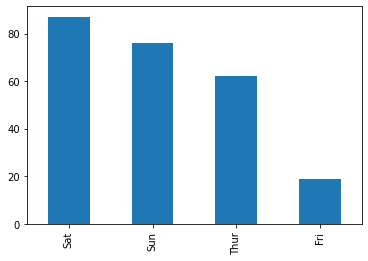

In [19]:
Tips.day.value_counts().plot(kind='bar')

In [21]:
#proportion of lunch and dinner in % , normalizing give proportions 
Tips.day.value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [22]:
#proportion of lunch and dinner in % , normalizing give proportions 
Tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [23]:
# When do people pay more tips during lunch or dinner, combining one dimension and one measure  
Tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [24]:
Tips.groupby(['day'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [27]:
Tips.groupby(['smoker'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [28]:
Tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [29]:
Tips.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

<AxesSubplot:xlabel='size'>

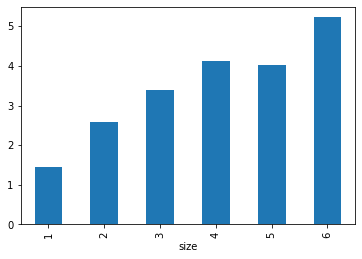

In [31]:
Tips.groupby(['size'])['tip'].mean().plot.bar()

In [32]:
#Cross table for smoker and sex, combining two dimensions and one measure 
Tips.groupby(['smoker','sex'])['tip'].mean()


smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [33]:
# Lets put above table in a pivot type structure or an organised way , UNSTACK is the function to be used 
Tips.groupby(['smoker','sex'])['tip'].mean().unstack()


sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


In [36]:
Tips.groupby(['day','time'])['tip'].mean().unstack()

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


<AxesSubplot:xlabel='day'>

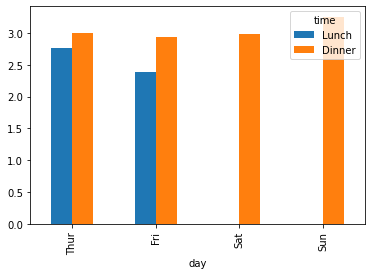

In [37]:
Tips.groupby(['day','time'])['tip'].mean().unstack().plot.bar()

In [41]:
#Create a new column to find out % of tip compared to total bill ,tips.pct is tips%
Tips['tips_pct'] = Tips.tip/Tips.total_bill 

In [42]:
#New col tips_pct is created 
Tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [45]:
Tips.groupby(['smoker','sex'])['tips_pct'].mean().unstack()


sex,Male,Female
smoker,,
Yes,0.152771,0.182150
No,0.160669,0.156921


<AxesSubplot:xlabel='smoker'>

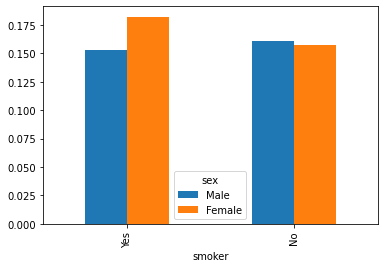

In [46]:
Tips.groupby(['smoker','sex'])['tips_pct'].mean().unstack().plot.bar()


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

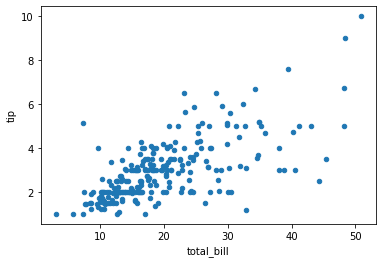

In [47]:
#Visualize relationship between total_bill and tip, interpretation as the bill increases we pay more bill but with some extreme outliers  
Tips.plot.scatter(x='total_bill',y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

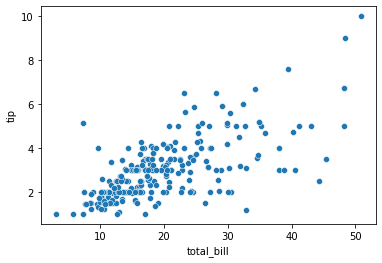

In [48]:
# Visualise using sns library 
sns.scatterplot(x='total_bill',y='tip',data= Tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

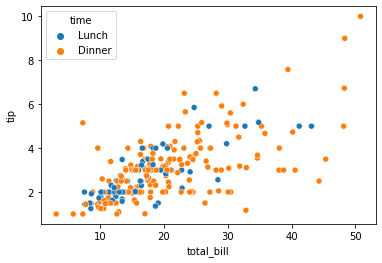

In [49]:
sns.scatterplot(x='total_bill',y='tip',data= Tips,hue='time')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

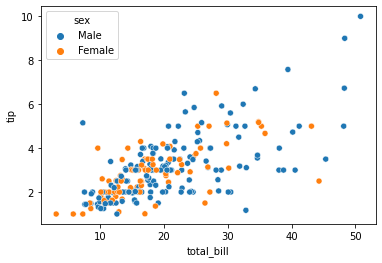

In [50]:
sns.scatterplot(x='total_bill',y='tip',data= Tips,hue='sex')

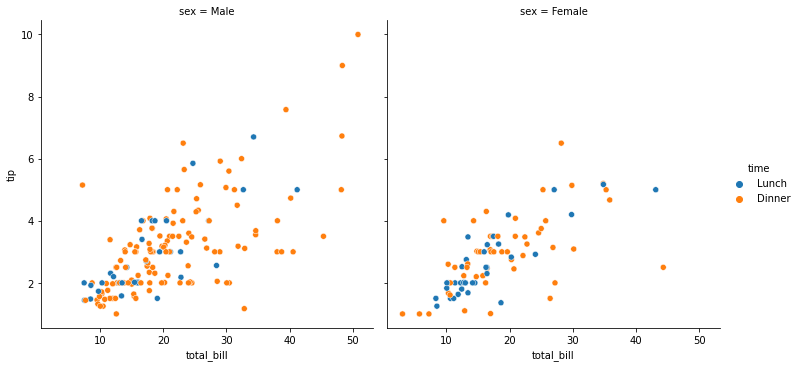

In [55]:
# Create bifurcation of time on on the chart above based on column sex 
sns.relplot(
    x="total_bill",y="tip",data= Tips,col="sex",hue="time")


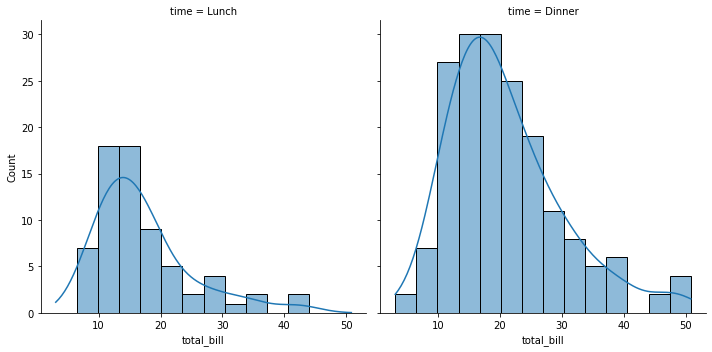

In [57]:
# distrubution plot : Lets see the distribution of time and total_bill, we use sns displot, shows that total bill is more during dinner time in the range of $10-$30
#and more people are coming during dinner and paying more 
sns.displot(data =Tips, x ='total_bill',col='time',kde =True)


In [65]:
# calculate the number of columns 
len(Tips.columns)

8

In [66]:
# calculate the no of rows 
len(Tips.index)

244

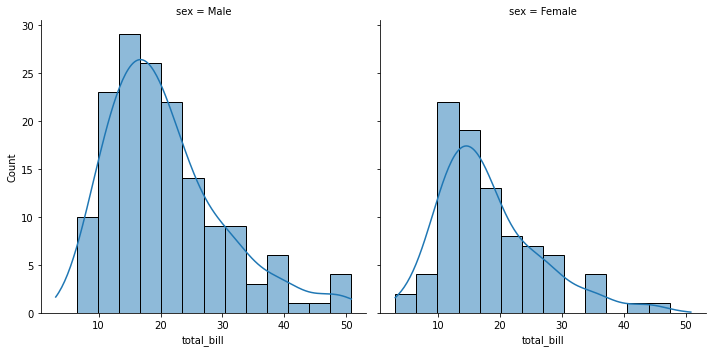

In [67]:
# Correlation of sex and total_bill shown through distribution plot , Male pay or come more compared to female 
sns.displot(data =Tips, x ='total_bill',col='sex',kde =True)

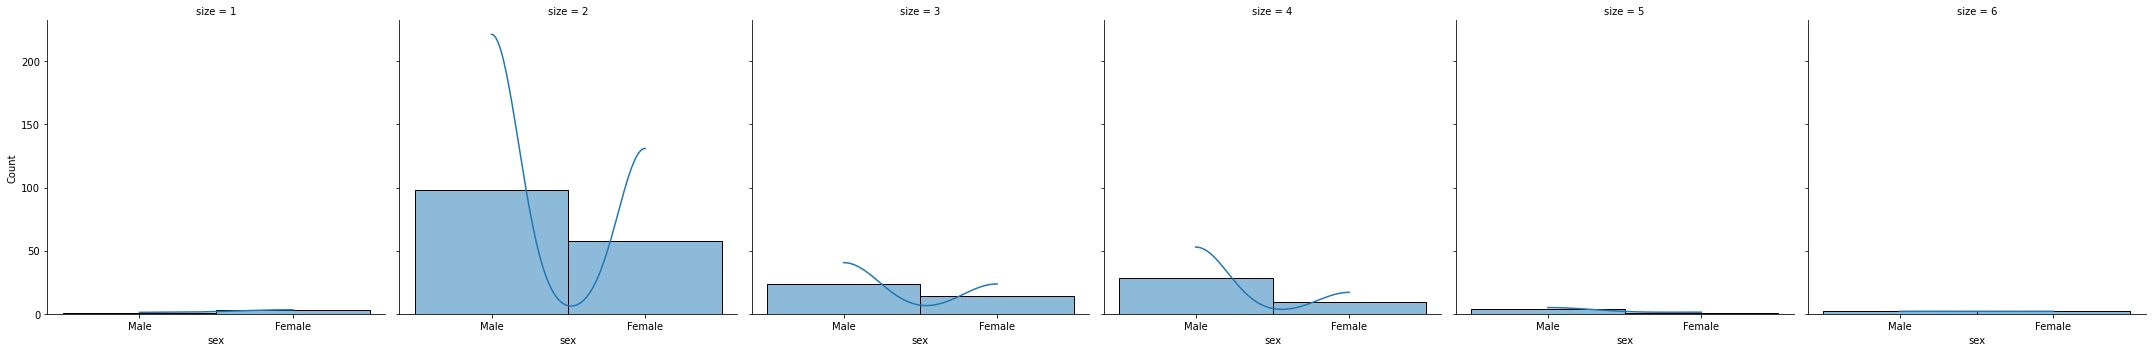

In [68]:
sns.displot(data =Tips, x ='sex',col='size',kde =True),
#Size of 2 is seen frequently with two males coming together is higher than 2 females coming together 

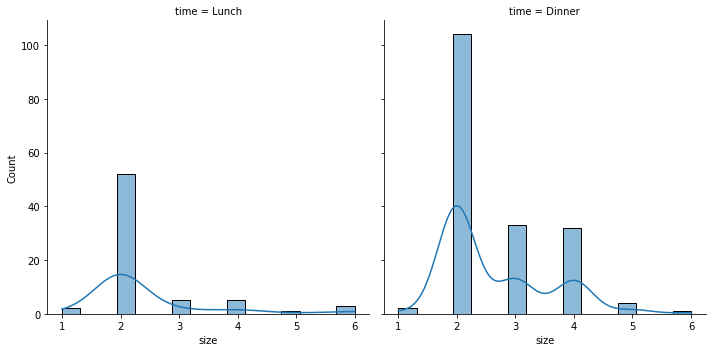

In [69]:
sns.displot(data =Tips, x ='size',col='time',kde =True)

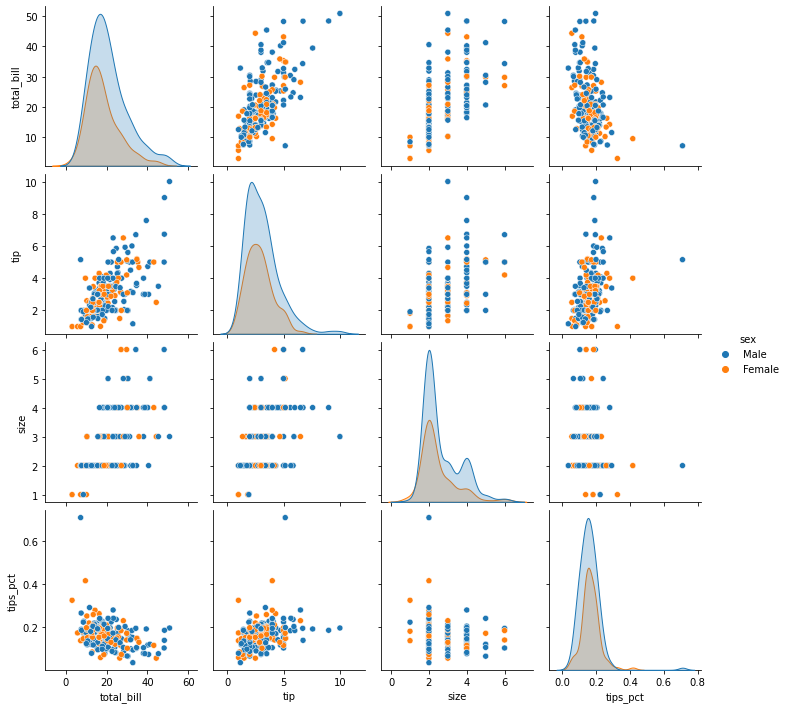

In [70]:
#Create correlation and distribution of all the numeric values by sex (Pairplot)
sns.pairplot(data=Tips,hue='sex')
